In [1]:
import numpy as np
import matplotlib.pyplot as plt

// Case Test #1
samples = np.array ([80, 80, 80, 80, 80, 80, 80, 81, 81, 85, 92, 100, 106, 116,
119, 119, 119, 117, 115, 110, 107, 107, 107, 108, 107, 105, 100, 99, 97, 93, 92,
90, 87, 86, 84, 83, 83, 82, 82, 82, 82, 81, 81, 81, 81, 80, 80, 80, 80, 80, 80,
80, 80, 80, 80, 80, 81, 81, 85, 92, 106, 112, 116, 119, 119, 119, 117, 112, 110,
107, 107, 108, 108, 105, 102, 100, 97, 95, 93, 90, 89, 87, 84, 84, 83, 83, 82,
82, 82, 81, 81, 81, 81, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81,
85, 100, 106, 112, 119, 119, 119, 117, 115, 112, 107, 107, 107, 108, 107, 105,
100, 99, 97, 95, 92, 90, 89, 86, 84, 84, 83, 82, 82, 82, 82, 81, 81, 81, 81,
80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 85, 92, 100, 112, 116, 119,
119, 120, 117, 112, 110, 107, 107, 108, 108, 107, 102, 100, 99, 95, 93, 92, 89,
87, 86, 84, 83, 83, 82, 82, 82, 82, 81, 81, 81, 80, 80, 80, 80, 80, 80, 80, 80,
80, 80, 80, 80, 81, 81, 85, 100, 106, 112, 116, 119, 119, 119, 115, 112, 110,
107, 107, 108, 107, 105, 102, 99, 97, 95, 92, 90, 89, 86, 84, 84, 83, 82, 82,
82, 82, 81, 81, 81, 81, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81,
92, 100, 106, 116, 119, 119, 119, 117, 115, 110, 107, 107, 108, 108, 107, 102,
100, 99, 97, 93, 92, 90, 87, 86, 84, 83, 83, 82, 82, 82, 82, 81, 81, 81, 80,
80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 85, 92, 106, 112, 116, 119,
119, 119, 115, 112, 110, 107, 107, 108, 108, 105, 102, 100, 97, 95, 93, 90, 89,
87, 84, 84, 83, 82, 82, 82, 82, 81, 81, 81, 81, 80, 80, 80, 80])


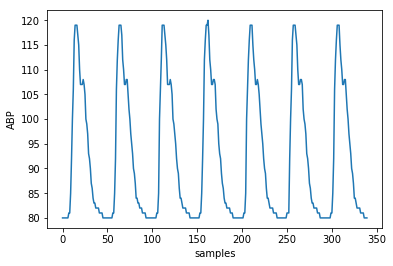

340


In [6]:
plt.plot(samples)
plt.ylabel('ABP')
plt.xlabel('samples')
plt.show()
print(len(samples))

In [24]:
def valeyDetector(samples, index):
    last = index
    i = index
    for y in range(index):
        if (samples[i] < samples[last]):
            last = i;
        if (samples[i] <= samples[i-1] and  samples[i] > samples[i+1]):
            return last;
        i = i - 1
    return 0
    
def peakDetector(buffer):
    last = 0
    next = False
    peaks = []
    for i in range(len(buffer)-1):
        if (buffer[i] > buffer[last] or next == True):
            last = i;
            next = False;
        if (buffer[i] >= buffer[i-1] and buffer[i] > buffer[i+1]):
            next = True
            v = valeyDetector(buffer, last)
            distance = last-v
            if (v != last and distance != 0):
                peaks.append([v, last, distance])
    return np.array(peaks)

peaks = peakDetector(samples)
print(peaks)

[[  0  14  14]
 [ 55  63   8]
 [104 111   7]
 [152 162  10]
 [201 209   8]
 [249 257   8]
 [298 306   8]]


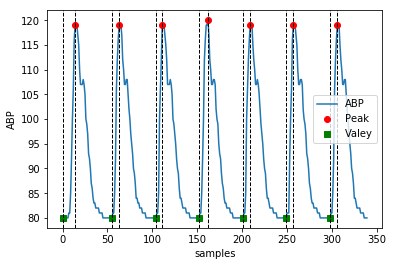

In [25]:
plt.plot(samples,label='ABP')
peaksPoints = [samples[index] for index in peaks[:,1]]
valleysPoints = [samples[index] for index in peaks[:,0]]
plt.plot(peaks[:,1],peaksPoints, 'ro', label='Peak')
plt.plot(peaks[:,0],valleysPoints, 'gs',label='Valey')
for xc in peaks[:,1]:
    plt.axvline(x=xc,color='k', linestyle='--', linewidth=1)
for xc in peaks[:,0]:
    plt.axvline(x=xc,color='k', linestyle='--', linewidth=1)
plt.ylabel('ABP')
plt.xlabel('samples')
plt.legend()
plt.show()

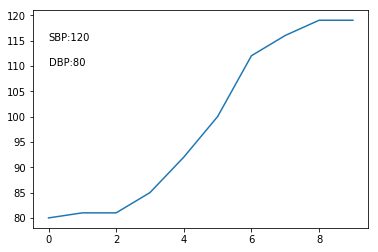

ERROR on measure point #17
ERROR on measure point #340
ERROR on measure point #0


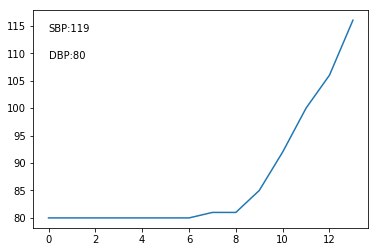

In [40]:
def measure(index):
    index = index - 1
    for i in range(len(peaks)-1):
        if (index-1 >= peaks[i][0] and
            index-1 <= peaks[i][1] and
            peaks[i][2]> peaks[i+1][2]):
            peak = samples[peaks[i][0]:peaks[i][1]]
            plt.plot(peak,label='ABP')
            plt.text(0,samples[peaks[i][1]]-5,"SBP:" + str(samples[peaks[i][1]]))
            plt.text(0,samples[peaks[i][1]]-10,"DBP:" + str(samples[peaks[i][0]]))
            plt.show()
            return
    print("ERROR on measure point #" + str(index+1))
    
measure(160)
measure(17)
measure(340)
measure(0)
measure(10)